In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Line Plots

Text(0, 0.5, 'y')

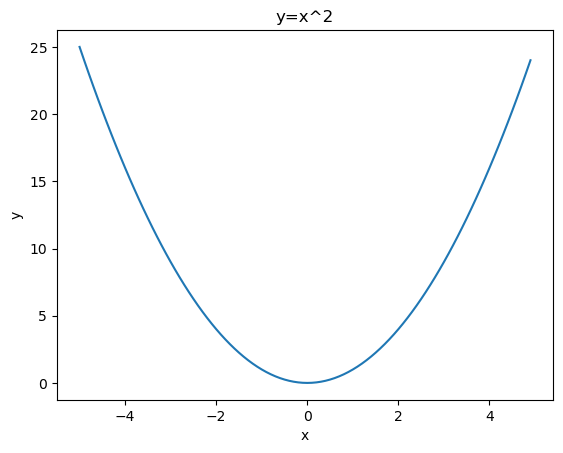

In [5]:
x = np.arange(-5, 5, 0.1)
y = np.square(x)

#create plot
plt.plot(x, y)


plt.title('y=x^2')

#add x label
plt.xlabel('x')

#add y label
plt.ylabel('y')

#show the chart
#plt.show()

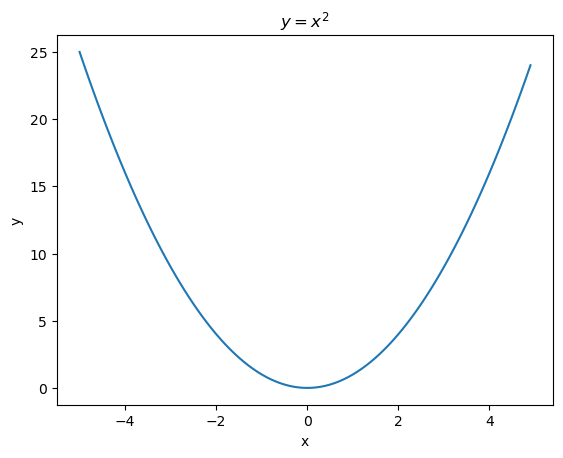

In [3]:
x = np.arange(-5, 5, 0.1)
y = np.square(x)

#create plot
plt.plot(x, y)

#add title use '$' for formatting
plt.title('$y=x^2$')

#add x label
plt.xlabel('x')

#add y label
plt.ylabel('y')

#show the chart w/o extras
plt.show()

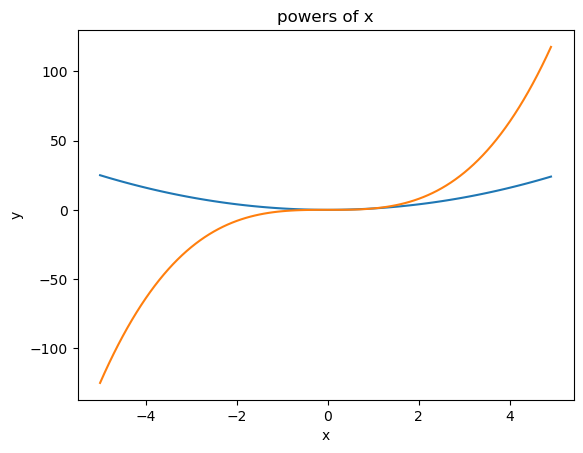

In [6]:
y2 = x ** 3

plt.plot(x,y)
plt.plot(x, y2)
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

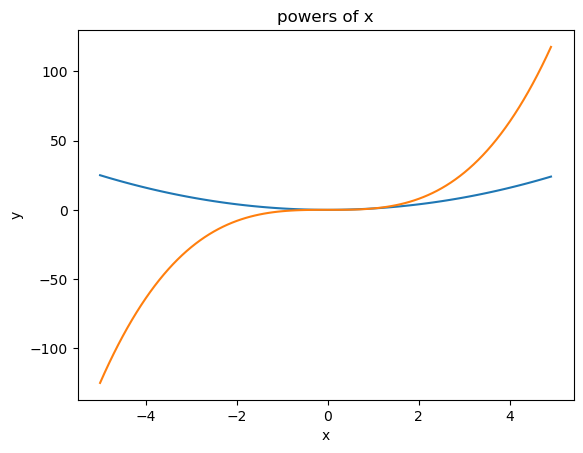

In [7]:
y2 = x ** 3

#dd label to plot
plt.plot(x,y, label = '$y=x^2$')
#add label to plot
plt.plot(x, y2, label = '$y2=x^3$')
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

- Nothing happens, yet, need to actually add the legend

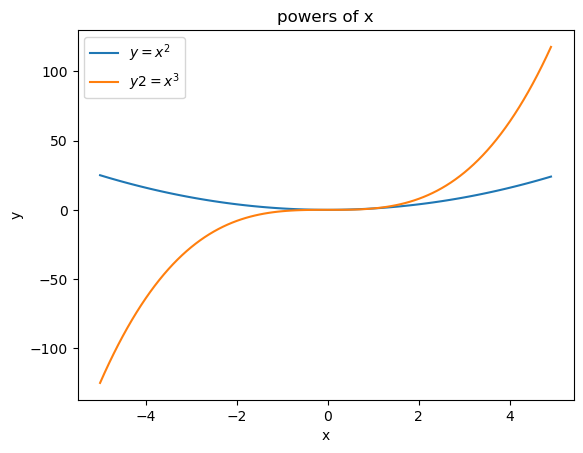

In [9]:
y2 = x ** 3

#dd label to plot
plt.plot(x,y, label = '$y=x^2$')
#add label to plot
plt.plot(x, y2, label = '$y2=x^3$')
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

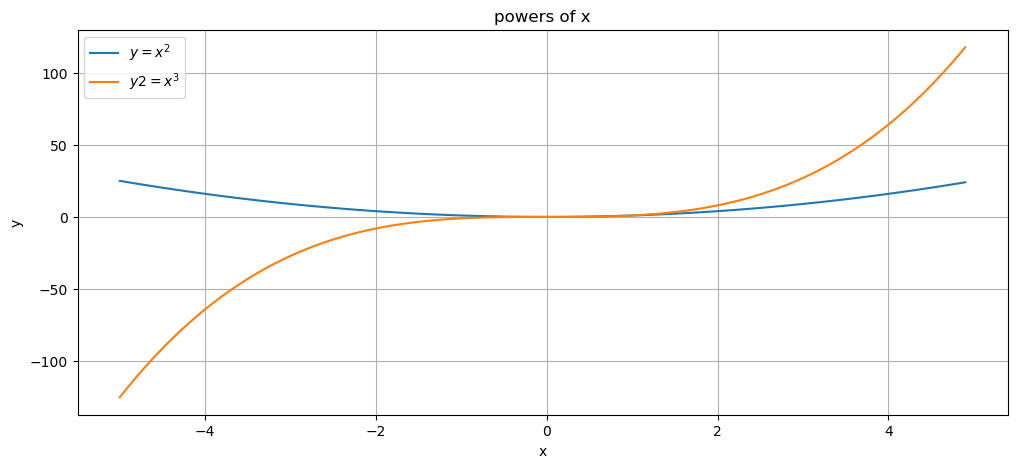

In [11]:
y2 = x ** 3

#change size
plt.figure(figsize = (12,5))

#dd label to plot
plt.plot(x,y, label = '$y=x^2$')
#add label to plot
plt.plot(x, y2, label = '$y2=x^3$')
plt.title('powers of x')
plt.xlabel('x')
plt.ylabel('y')

#add legend
plt.legend()

#add grid
plt.grid()

plt.show()

#save the figure
plt.savefig("figure1.png")

# Histograms

In [12]:
df = pd.read_csv('titanic.csv')

In [13]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df.shape

(891, 12)

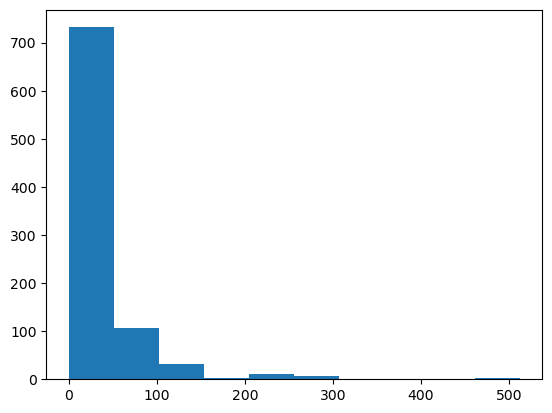

In [15]:
#plot distribution of the fare

plt.hist(df.Fare)
plt.show()

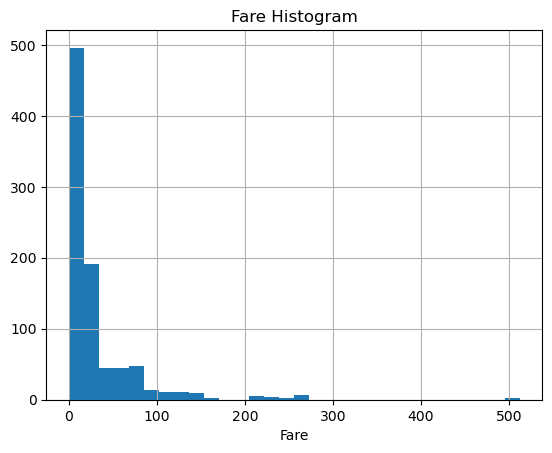

In [18]:
plt.hist(df.Fare, bins = 30)
plt.grid()
plt.xlabel('Fare')
plt.title('Fare Histogram')
plt.show()

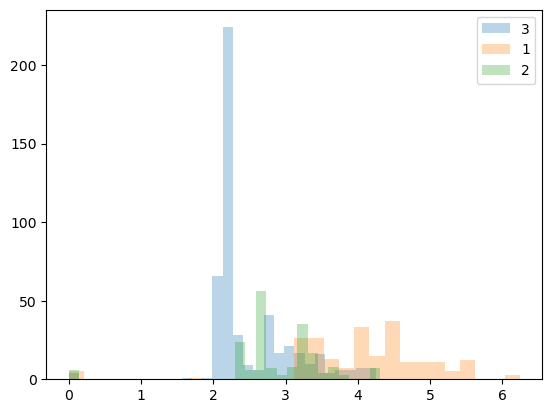

In [20]:
df['log_fare'] = np.log(1 + df.Fare)

for c in df.Pclass.unique():
    plt.hist(df.loc[df.Pclass == c, 'log_fare'],
            bins = 30, # num of bins
            alpha = 0.3, #opacity level
            label = c) #label the classes
    
plt.legend()
plt.show()

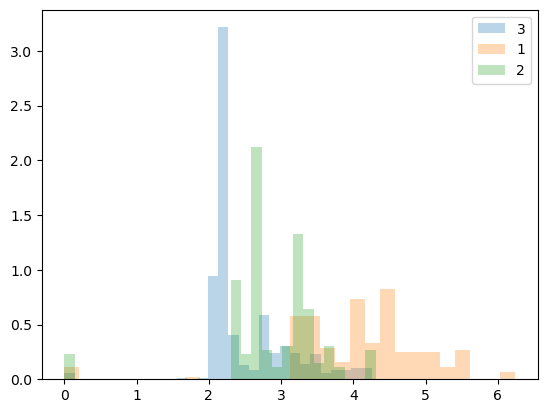

In [21]:
#probabilyt distribution
df['log_fare'] = np.log(1 + df.Fare)

for c in df.Pclass.unique():
    plt.hist(df.loc[df.Pclass == c, 'log_fare'],
            bins = 30, # num of bins
            alpha = 0.3, #opacity level
            label = c,#label the classes
            density = True) #show probability distrubution
    
plt.legend()
plt.show()

- Can see w/ distribution that class 2 is paying more than is simply represented in the original histogram which accounts for the number of fares, rather than the price. There is some overlap in all the classes. 

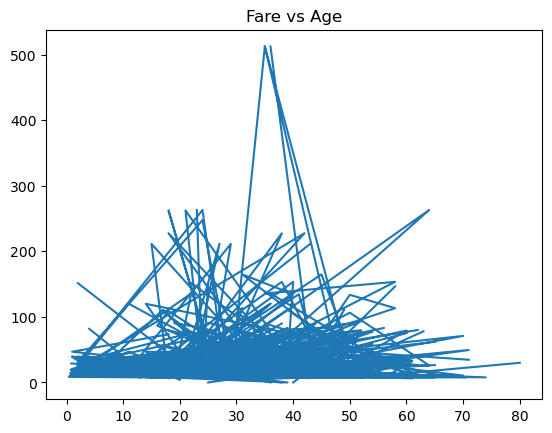

In [22]:
#example of what not to do with two continuous variables
plt.plot(df.Age, df.Fare)
plt.title('Fare vs Age')
plt.show()

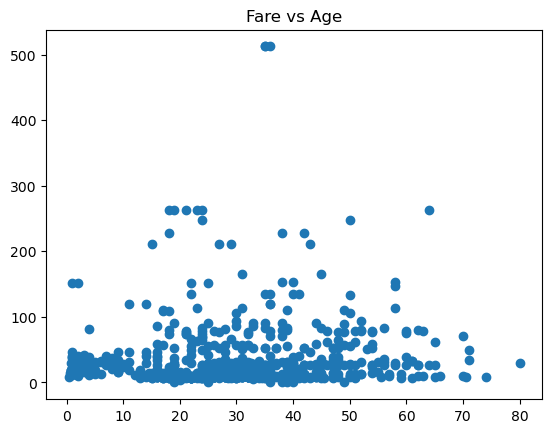

In [23]:
#example of what to do with two continuous variables
plt.scatter(df.Age, df.Fare) #(x, y)
plt.title('Fare vs Age')
plt.show()

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
log_fare         0
dtype: int64

In [26]:
df.shape

(891, 13)

In [27]:
#drop nan values

df.dropna(inplace = True, subset = ['Fare', 'Age'])
df.shape

(714, 13)

# Linear Regression to see line of best fit

In [29]:
from sklearn.linear_model import LinearRegression

#create model
model = LinearRegression()

#fit model
model.fit(df.Age.values.reshape(-1, 1), df.Fare.values.reshape(-1, 1)) #reshaped because it expects a 2D array aka [:, None]

x = np.arange(df.Age.min(), df.Age.max(), 0.1).reshape(-1, 1)

y = model.predict(x)

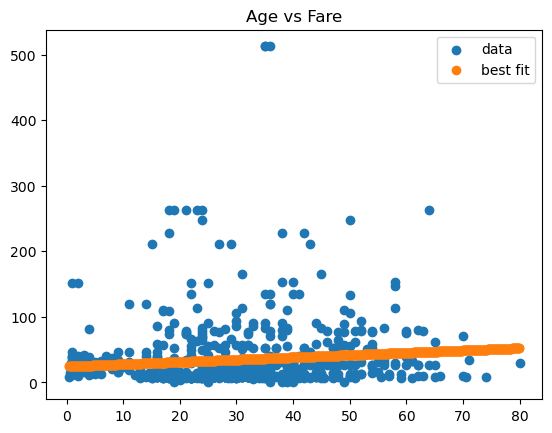

In [31]:
plt.scatter(df.Age, df.Fare, label = 'data')
plt.scatter(x, y, label = 'best fit')

plt.title('Age vs Fare')
plt.legend()
plt.show()

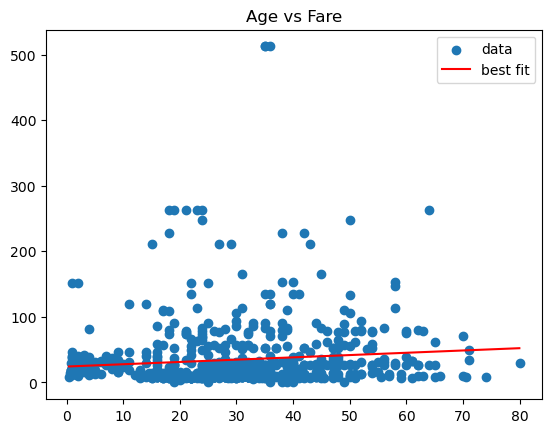

In [33]:
plt.scatter(df.Age, df.Fare, label = 'data')
plt.plot(x, y, label = 'best fit', c = 'r')

plt.title('Age vs Fare')
plt.legend()
plt.show()